# Setup dependencies

In [1]:
!apt install neofetch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  neofetch
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 74.8 kB of archives.
After this operation, 365 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 neofetch all 3.4.0-1 [74.8 kB]
Fetched 74.8 kB in 1s (60.5 kB/s)
Selecting previously unselected package neofetch.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../neofetch_3.4.0-1_all.deb ...
Unpacking neofetch (3.4.0-1) ...
Setting up neofetch (3.4.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!nvidia-smi

Mon Jan 24 05:56:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!neofetch

            .-/+oossssoo+/-. 
        `:+ssssssssssssssssss+:` 
      -+ssssssssssssssssssyyssss+- 
    .ossssssssssssssssssdMMMNysssso. 
   /ssssssssssshdmmNNmmyNMMMMhssssss/ 
  +ssssssssshmydMMMMMMMNddddyssssssss+ 
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/ 
  +sssssssssdmydMMMMMMMMddddyssssssss+ 
   /ssssssssssshdmNNNNmyNMMMMhssssss/ 
    .ossssssssssssssssssdMMMNysssso. 
      -+sssssssssssssssssyyyssss+- 
        `:+ssssssssssssssssss+:` 
            .-/+oossssoo+/-. 
root@45ff1ff2532e 
----------------- 
OS: Ubuntu 18.04.5 LTS x86_64 
Host: Google Compute Engine 
Kernel: 5.4.144+ 
Uptime: 8 mins 
Packages: 1394 
Shell: bash 4.4.20 
Terminal: jupyter-noteboo 
CPU: Intel Xeon (4) @ 2.299GHz 
Memor

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pickle
import json
import numpy as np
import os

import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import pandas as pd
import seaborn as sb
import scipy as sp
import sklearn.preprocessing as skp
import skimage
import skimage.io
import skimage.transform
import numpy as np
import cv2

import sys

np.set_printoptions(threshold=sys.maxsize)

from tensorflow_core import ConfigProto

config = ConfigProto()
config.gpu_options.allow_growth = True

In [7]:
checkpoint_dir = "/content/drive/My Drive/Thesis - Recommender System/CNN_ObjectDetection"

scaler = skp.StandardScaler()

# Read data + some plotting

## Implement load + scale image (CPUs)





In [8]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def read_data(directory, is_train):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']

    data, labels = [], []

    if is_train:
        for i in range(1, 6):
            filename = '{}/data_batch_{}'.format(directory, i)

            batch_data = unpickle(filename)
            if len(data) > 0:
                data = np.vstack((data, batch_data['data']))
                labels = np.hstack((labels, batch_data['labels']))
            else:
                data = batch_data['data']
                labels = batch_data['labels']
    else:
        filename = '{}/test_batch'.format(directory)
        batch_data = unpickle(filename)

        data = np.array(batch_data['data'])
        labels = np.array(batch_data['labels'])

    return names, data, labels

def scale_imgs(data):
    # 3072 = 3 * 32 * 32
    # origional image size = (32 x 32)
    # each pixel contain a list of (R, G, B)
    imgs = np.reshape(data, (data.shape[0], 3, 32, 32))

    # tranpose, allow displaying with matplotlib
    proper_imgs = np.transpose(imgs, (0,2,3,1))

    imgs_norm = np.divide(proper_imgs, 255.0) # normalize RGBs

    # # crop to 30 x 30 image, from center
    # cropped_imgs = imgs_norm[:, 2:30, 2:30, :]

    resized_img = skimage.transform.resize(imgs_norm, (data.shape[0], 224, 224))
    # resized_img = cv2.resize(cropped_imgs, (data.shape[0], 224, 224))

    # calculate mean of (R, G, B)
    # grayscale_imgs = np.reshape(
    #     np.mean(resized_img, axis=3),
    #     (data.shape[0], 224, 224, 1))

    # mean = np.mean(grayscale_imgs)
    # std_deviation = np.std(grayscale_imgs)

    # norm = np.divide(np.subtract(grayscale_imgs, mean), std_deviation)

    return resized_img

def scale_img(data):
    # 3072 = 3 * 32 * 32
    # origional image size = (32 x 32)
    # each pixel contain a list of (R, G, B)
    imgs = np.reshape(data, (3, 32, 32))

    # tranpose, allow displaying with matplotlib
    proper_imgs = np.transpose(imgs, (1,2,0))

    imgs_norm = np.divide(proper_imgs, 255.0) # normalize RGBs

    # # crop to 30 x 30 image, from center
    # cropped_imgs = imgs_norm[:, 1:31, 1:31, :]

    resized_img = skimage.transform.resize(imgs_norm, (224, 224))
    # resized_img = cv2.resize(cropped_imgs, (224, 224))

    # calculate mean of (R, G, B)
    # grayscale_imgs = np.reshape(
    #     np.mean(resized_img, axis=2),
    #     (224, 224, 1))
    
    # mean = np.mean(grayscale_imgs)
    # std_deviation = np.std(grayscale_imgs)

    # norm = np.divide(np.subtract(grayscale_imgs, mean), std_deviation)

    return resized_img


## Implement plot images

In [9]:
def plot_images(images, label_ids, label_names, is_original, is_scale=True):
    
    # fig_s = plt.gcf()
    # fig_s.set_size_inches(30, 30)
    
    # 3x3 grid
    fig, axes = plt.subplots(6, 6, figsize=(10,10))
    fig.tight_layout()

    # fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat): # from 0 -> 8

        # Show image.
        if is_original:
            img = np.reshape(images[i], (3, 32, 32))
            proper_imgs = np.transpose(img, (1, 2, 0))

            ax.imshow(proper_imgs, \
                      interpolation="spline16")
        else:
            if is_scale == True:
                ax.imshow(np.reshape(scale_img(images[i]), (224, 224, 3)), \
                          interpolation="spline16")
            else: ax.imshow(np.reshape(images[i], (224, 224, 3)), \
                          interpolation="spline16")
            
        _class_ = label_names[label_ids[i]]
        
        xlabel = "{0}".format(_class_)

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()


## Implement plot pie chart 

In [10]:
def plot_pie_chart(y_dataset):
    clusters = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    clusters_label = np.array(\
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    for i in range(y_dataset.shape[0]):
        clusters[int(y_dataset[i]) - 1] += 1

    colors = sb.color_palette("Paired", 10)
    
    labels = ['{0:02d} - {2:04d} units ({1:1.2f} %)'.format(i,j, k) \
        for i,j, k in zip(clusters_label, \
           100.*clusters/clusters.sum(),
           clusters)]

    patches, texts = plt.pie(clusters, colors=colors, radius=1.25)

    sorted_zip = np.column_stack(\
         (patches, labels, clusters, clusters_label))

    sorted_zip = sorted_zip[np.apply_along_axis(lambda x: x[2], 1, sorted_zip).argsort()[::-1]]

    plt.legend(sorted_zip[:, 0], sorted_zip[:, 1], bbox_to_anchor=(1.9,1.0), \
        loc="upper right", fontsize=10)

    plt.show()

## Read data (train + test)

In [11]:
# t_train_size = 100
# t_test_size = 32

names, data, labels = read_data(\
    "/content/drive/My Drive/dataset/cifar10", is_train=True)

# data = data[5000:5000+t_train_size]
# labels = labels[5000:5000+t_train_size]

t_names, t_data, t_labels = read_data(\
    "/content/drive/My Drive/dataset/cifar10", is_train=False)

# t_data = t_data[1000:1000+t_test_size]
# t_labels = t_labels[1000:1000+t_test_size]

evaluation_size = 1000
evaluation_pos = 2000
t_data_eva = t_data[evaluation_pos:evaluation_pos+evaluation_size]
t_labels_eva = t_labels[evaluation_pos:evaluation_pos+evaluation_size]

## Display images

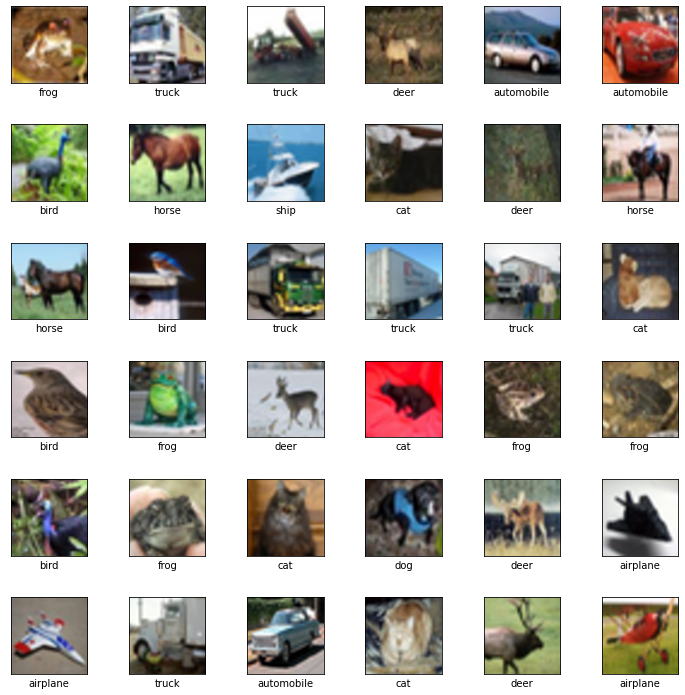

In [12]:
plot_images(data, labels, names, is_original=True)

## Pie chart Training dataset

TRAINNING SIZE 50000 units


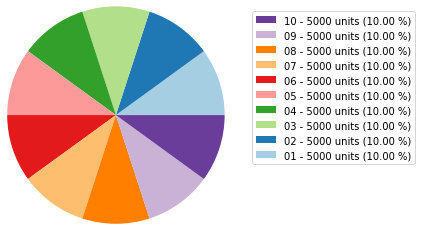

In [13]:
print(f"TRAINNING SIZE {labels.shape[0]} units")
plot_pie_chart(labels)

## Pie chart Testing dataset

TESTING SIZE 10000 units


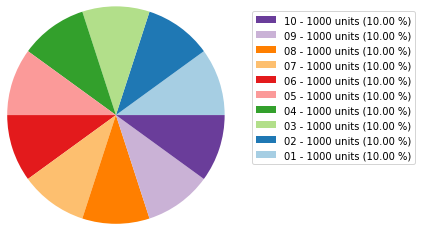

In [14]:
print(f"TESTING SIZE {t_labels.shape[0]} units")
plot_pie_chart(t_labels)

## Pie chart Evaluation dataset

EVALUATION SIZE 1000 units


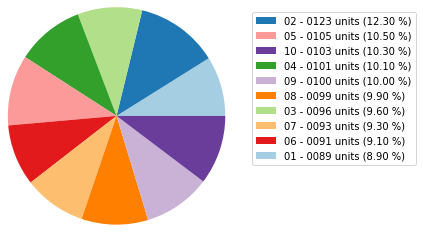

In [15]:
print(f"EVALUATION SIZE {t_labels_eva.shape[0]} units")
plot_pie_chart(t_labels_eva)

## Data augmentations

In [16]:
def plot_augments(images, augments):
        
    # 3x3 grid
    fig, axes = plt.subplots(4, 2, figsize=(8, 8))
    fig.tight_layout(h_pad=1.5, w_pad=0.05)

    for i, ax in enumerate(axes.flat): # from 0 -> 8
        if i % 2 == 0:
            ax.imshow(images[int(i / 2)], \
                interpolation="spline16")
        else:
            ax.imshow(augments[int(i / 2)], \
                interpolation="spline16") 
        
        xlabel = "{0}".format(f"CIFAR10-{i}")

        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

offset = 50
batch = data[offset:offset+4]

sess = tf.Session()

img = np.reshape(batch, (batch.shape[0], 3, 32, 32))
proper_imgs = np.divide(np.transpose(img, (0, 2, 3, 1)), 255.)

### Grey White

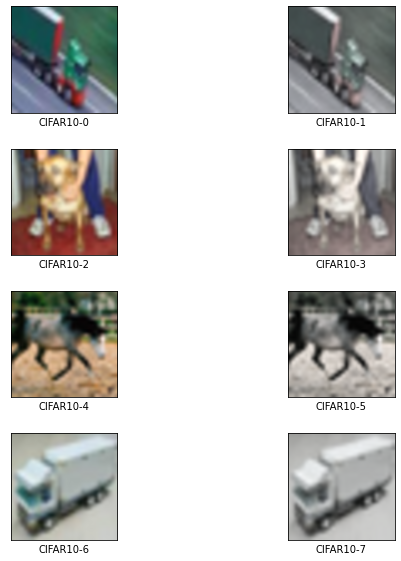

In [17]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.random_saturation(proper_imgs, lower=0.05, upper=0.2))
)

### Random Saturations

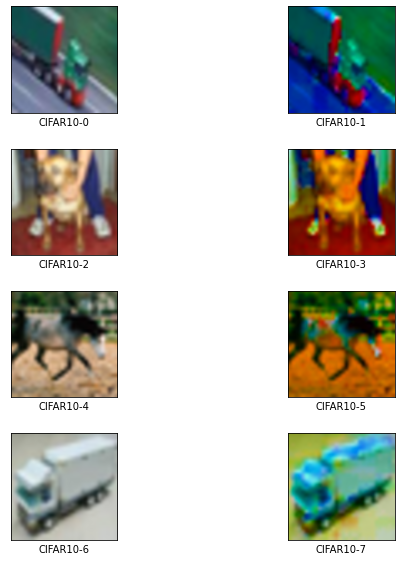

In [18]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.random_saturation(proper_imgs, lower=2., upper=15.))
)

### Random Hue

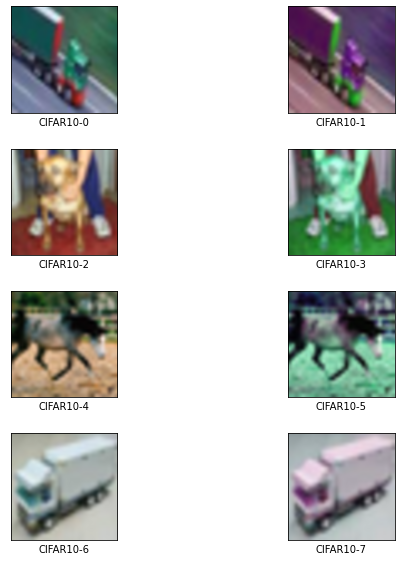

In [19]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.random_hue(proper_imgs, max_delta=0.35))
)

### Random contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


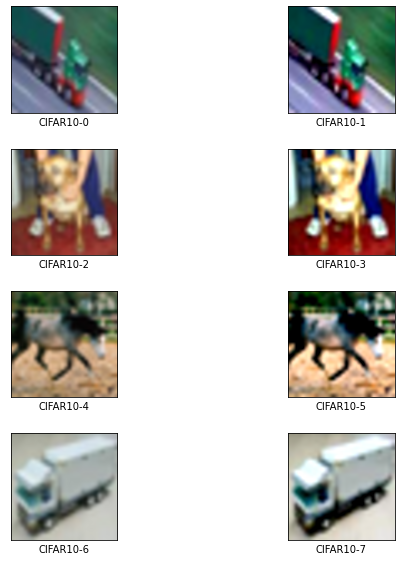

In [20]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.random_contrast(proper_imgs, lower=1.5, upper=2.5))
)

### Random brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


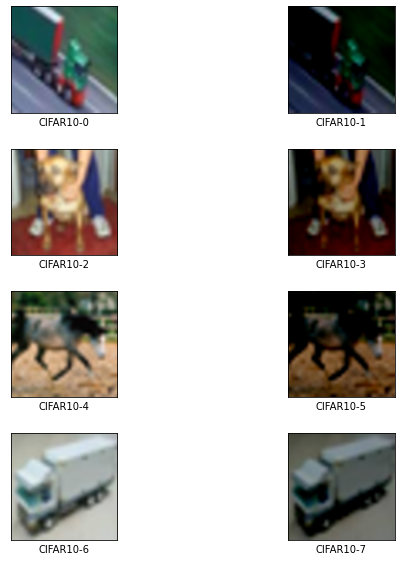

In [21]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.random_brightness(proper_imgs, max_delta=0.35))
)

### Flip right

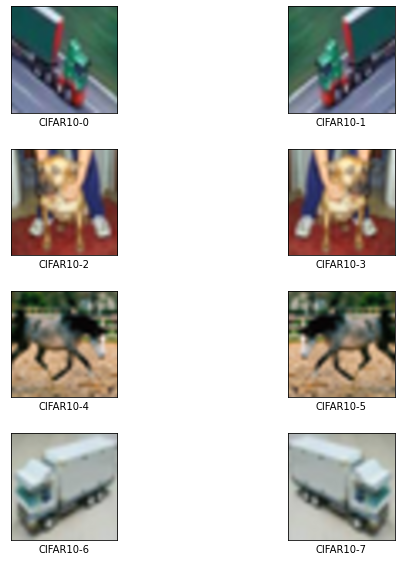

In [22]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.flip_left_right(proper_imgs))
)

### Flip vertical

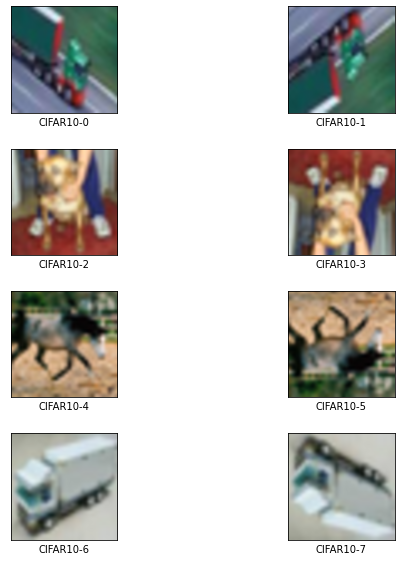

In [23]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.flip_up_down(proper_imgs))
)

### Random rotation 

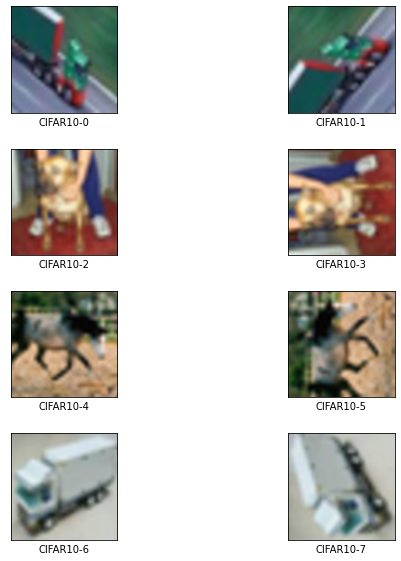

In [24]:
plot_augments(
    proper_imgs,

    # multiply RGBs
    sess.run(tf.image.rot90(proper_imgs, k=tf.cast(tf.random.uniform(shape=[], minval=1, maxval=4), tf.int32)))
)

# Implementation

## Some pre-knowledge

### VGG-16 Deep CNN architecture

<br/>

![](https://drive.google.com/uc?export=view&id=1UlY-egJ4Uhhj9V3DSDOSPgyYtAGcTKh-)

### Kaiming He initial weights for ReLu activations

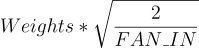

## Some util functions

In [25]:
def show_weights(W):

  rows, cols = 8, 8
  for i in range(np.shape(W)[3]):

    img = W[:, :, 0, i]
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

  plt.show()

def show_conv(data):

  rows, cols = 8, 8
  for i in range(np.shape(data)[3]):

    img = data[0, :, :, i]
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

  plt.show()

## Hyperparameters

This hyperparameters setting is for small batch size (< 100)

We'll try to make the neural networks architecture with with small batch firt

Then multiply the batch size by k, learning_rate = learning_rate * k 

In [26]:
learning_rate = 0.00065
decay_rate = 0.00025 # approximately around 45 epochs 
lambda_val = 0.00001
training_epochs = 5000 # for early stopping
batch_size = 20

num_dense_layers = 2
num_dense_neurons = [4096, 4096]
drop_rates = [0.45, 0.45] # 3  layer of drop rate

num_conv_layers = 13
conv_stride_steps = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
filter_wnd_w = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
filter_wnd_h = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
num_filters = [64, 64, 128, 128, 256, 256, 256, 512, 512, 512, 512, 512, 512]
conv_padding_strategies = ['SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME', 'SAME']

maxpool_wnd_w = [2, 2, 2, 2, 2]
maxpool_wnd_h = [2, 2, 2, 2, 2]
maxpool_stride_steps = [2, 2, 2, 2, 2]
maxpool_padding_strategies = ['SAME', 'SAME', 'SAME', 'SAME', 'SAME']

## Convert labels into one-hot vector

In [27]:
def convert_to_one_hot(y_dataset, num_labels):
    y_one_hot = np.array([-99.] * num_labels)
    for val in y_dataset:
        one_hot = np.array(\
            [0.] * int(val) + [1.] + [0.] * int(num_labels - val - 1))
        
        y_one_hot = np.vstack((y_one_hot, one_hot))
    
    return y_one_hot[1:] # remove first dummy

y_train_one_hot = convert_to_one_hot(labels, len(names))
y_test_one_hot = convert_to_one_hot(t_labels, len(t_names))
y_test_one_hot_eva = convert_to_one_hot(t_labels_eva, len(t_names))

## Implement batch normalization

In [28]:
def batch_norm(x, W, b):
    mean = tf.reduce_mean(x)

    std_deviation = tf.sqrt(
        tf.reduce_mean(tf.square(
            tf.subtract(x, mean)
        ))
    )

    norm = tf.divide(tf.subtract(x, mean), std_deviation)
    norm_w = tf.add(tf.multiply(norm, W), b)
    return norm_w 

## Implement Relu activation function

In [29]:
def relu_act(x):
    return tf.maximum(0., x)

## Implement scaling layer

In [30]:
def tf_preprocess_images(data):
    data_f = tf.cast(data, tf.float32)
    data_shape = tf.shape(data_f)
    data_size = tf.squeeze(tf.slice(data_shape, [0], [1]))

    # 3072 = 3 * 32 * 32
    # origional image size = (32 x 32)
    # each pixel contain a list of (R, G, B)
    imgs = tf.reshape(data_f, [data_size, 3, 32, 32])

    # tranpose, allow displaying with matplotlib
    proper_imgs = tf.transpose(imgs, [0,2,3,1])

    imgs_norm = tf.divide(proper_imgs, 255.0) # normalize RGBs

    # # crop to 24 x 24 image, from center
    # cropped_imgs = tf.image.crop_to_bounding_box(
    #     imgs_norm, offset_height=4, offset_width=4, target_height=28, target_width=28
    # )

    # mean = np.mean(grayscale_imgs)
    # std_deviation = np.std(grayscale_imgs)

    # norm = np.divide(np.subtract(grayscale_imgs, mean), std_deviation)

    return imgs_norm

## Implement augment layer

In [49]:
def tf_augment_images(data):
    gray_whites = tf.concat([data, tf.image.random_saturation(data, lower=0.05, upper=0.2)], 0)
    # random_saturations = tf.concat([gray_whites, tf.image.random_saturation(data, lower=2., upper=15.)], 0)
    # random_hues = tf.concat([random_saturations, tf.image.random_hue(data, max_delta=0.35)], 0)
    random_contrasts = tf.concat([gray_whites, tf.image.random_contrast(data, lower=1.5, upper=2.5)], 0)
    # random_brightness = tf.concat([random_contrasts, tf.image.random_brightness(data, max_delta=0.45)], 0)
    flip_left_right = tf.concat([random_contrasts, tf.image.flip_left_right(data)], 0)

    return flip_left_right


## Implement convolutional layer

Use ReLU over Tanh, Sigmoid. Result in better results

In [50]:
def conv_layer(x, W, b, conv_stride_step, conv_padding, \
                is_maxpool, is_dropout, \
                maxpool_wnd_size=None, maxpool_stride_step=None, maxpool_padding=None, \
                drop_rate=None):
    conv = tf.nn.conv2d(x, W, strides=[conv_stride_step] * 4, padding=conv_padding)
    conv_with_b = tf.nn.bias_add(conv, b)
    conv_relu = relu_act(conv_with_b)
    
    # max pool layer
    conv_maxpool = None
    if is_maxpool:
      conv_maxpool = tf.nn.max_pool(conv_relu, \
          ksize=[maxpool_wnd_size[0], maxpool_wnd_size[1]], \
          strides=[1, maxpool_stride_step, maxpool_stride_step, 1], \
          padding=maxpool_padding)
    
    # dropout layer
    if is_dropout:
      if conv_maxpool != None:
          return tf.nn.dropout(conv_maxpool, rate=drop_rate)
      else: return tf.nn.dropout(conv_relu, rate=drop_rate)

    if conv_maxpool != None:
        return conv_maxpool
    else: return conv_relu

## Implement dense layer

In [51]:
def dense_layer(x, W, b):
    dense = tf.add(tf.matmul(x, W), b)
    return relu_act(dense)

## Implement softmax function

In [52]:
def softmax_func(logits):
    min_logits = tf.reduce_min(logits)
    max_logits = tf.reduce_max(logits)

    new_logit = tf.divide(
        tf.subtract(logits, min_logits),
        tf.subtract(max_logits, min_logits)
    )
    
    logits_e = tf.exp(new_logit)

    sum_logits = tf.reduce_sum(logits_e)
    
    return tf.divide(logits_e, sum_logits)
    # return logits

## Placeholders to feed data

In [53]:
# 32 x 32 images
x = tf.placeholder(tf.float32, [None, 3072])

# one-hot vector
y = tf.placeholder(tf.float32, [None, 10])

## Decay learning rate tensor

In [54]:
EPOCH_id = tf.Variable(0., name="EPOCH_id")
DECAY_lr = tf.multiply(
    tf.exp(
        tf.multiply(-1., tf.multiply(decay_rate, EPOCH_id))
    ), learning_rate
) 

## Parameters for 13 hidden convolutional layers 

Filter window size = (3 x 3)

Stride size = (1 x 1)

In [55]:
LIST_conv_w = []
LIST_conv_b = []

SUM_conv = tf.constant(0.)
COUNT_conv = tf.constant(0.)

for i in range(0, num_conv_layers):
    wnd_h = filter_wnd_h[i]
    wnd_w = filter_wnd_w[i]
    
    chanel = 3
    if i > 0: chanel = num_filters[i - 1]

    num_filter = num_filters[i]

    CONV_w = tf.random_normal([wnd_h, wnd_w, chanel, num_filter])
    CONV_b = tf.random_normal([num_filter])
    fan_in = np.float32(wnd_h * wnd_h * chanel)
    he_norm = tf.cast(tf.sqrt(
        tf.divide(2., fan_in)
    ), tf.float32)

    VAR_CONV_w = tf.Variable(tf.multiply(CONV_w, he_norm), name=f"CONV_W{i + 1}")
    VAR_CONV_b = tf.Variable(tf.multiply(CONV_b, he_norm), name=f"CONV_B{i + 1}")

    SUM_conv = tf.add(
        SUM_conv,
        tf.reduce_sum(tf.square(
            tf.nn.bias_add(VAR_CONV_w, VAR_CONV_b))   
        )
    )
    COUNT_conv = tf.add(
        COUNT_conv, tf.cast(wnd_h * wnd_w * chanel * num_filter, dtype=tf.float32)
    )

    LIST_conv_w.append(VAR_CONV_w)
    LIST_conv_b.append(VAR_CONV_b)

## Parameters for 2 dense layers

After 13 convolutional layer, with 'SAME' strategy
image compacted into (7 x 7) matrix 

In [56]:
LIST_dense_w = []
LIST_dense_b = []

SUM_dense = tf.constant(0.)
COUNT_dense = tf.constant(0.)

for i in range(0, num_dense_layers):
    
    fan_in = 7 * 7 * num_filters[12]
    if i > 0: fan_in = num_dense_neurons[i - 1]

    fan_out = num_dense_neurons[i]
    
    DENSE_w = tf.random_normal([fan_in, fan_out])
    DENSE_b = tf.random_normal([fan_out])

    he_norm = tf.cast(tf.sqrt(
        tf.divide(2., fan_in)
    ), tf.float32)

    VAR_DENSE_w = tf.Variable(tf.multiply(DENSE_w, he_norm), name=f"DENSE_W{i + 1}")
    VAR_DENSE_b = tf.Variable(tf.multiply(DENSE_b, he_norm), name=f"DENSE_B{i + 1}")

    SUM_dense = tf.add(
        SUM_dense,
        tf.reduce_sum(tf.square(
            tf.nn.bias_add(VAR_DENSE_w, VAR_DENSE_b))   
        )
    )
    COUNT_dense = tf.add(
        COUNT_dense, tf.cast(fan_in * fan_out, dtype=tf.float32)
    )

    LIST_dense_w.append(VAR_DENSE_w)
    LIST_dense_b.append(VAR_DENSE_b)

## Parameters for batch norm layers

In [57]:
LIST_bn_w = []
LIST_bn_b = []

# number of maxpool layer + dense layer
for i in range(0, len(maxpool_stride_steps) + num_dense_layers):
    
    BN_w = tf.random.uniform(shape=[1], minval=0.8, maxval=1.5)
    BN_b = tf.random.uniform(shape=[1], minval=0.8, maxval=1.5)

    LIST_bn_w.append(tf.Variable(BN_w, name=f"BN_W{i + 1}"))
    LIST_bn_b.append(tf.Variable(BN_b, name=f"BN_B{i + 1}"))

## Parameters for softmax layer

Convert CNN results into one-hot compatible shape

In [58]:
SUM_softmax = tf.constant(0.)
COUNT_softmax = tf.constant(0.)

fan_in = num_dense_neurons[1]
he_norm = tf.cast(tf.sqrt(
    tf.divide(2., np.float32(fan_in))
), tf.float32)

SOFTMAX_w = tf.Variable(tf.multiply(
    tf.random_normal([fan_in, 10]),
    he_norm
), name="SOFTMAX_w")

SOFTMAX_b = tf.Variable(tf.multiply(
    tf.random_normal([10]),
    he_norm
), name="SOFTMAX_b")

SUM_softmax = tf.add(
    SUM_softmax,
    tf.reduce_sum(tf.square(
        tf.nn.bias_add(SOFTMAX_w, SOFTMAX_b))   
    )
)
COUNT_softmax = tf.add(
    COUNT_softmax, tf.cast(fan_in * 10, dtype=tf.float32)
)

## Completed model

In [59]:
def model(is_dropout):
    preprocess_x = tf.image.resize_images(
        tf_preprocess_images(x),
        size=[224, 224], method=tf.image.ResizeMethod.BILINEAR
    )

    x_scale = None
    x_shuffle = None
    y_shuffle = None

    if is_dropout:
        x_scale = tf_augment_images(preprocess_x)
        x_data_shape = tf.shape(x_scale)
        x_data_size = tf.squeeze(tf.slice(x_data_shape, [0], [1]))

        y_data_shape = tf.shape(y)
        y_data_size = tf.squeeze(tf.slice(y_data_shape, [0], [1]))

        y_augments = tf.tile(y, [tf.cast(tf.divide(x_data_size, y_data_size), tf.int32), 1]) 

        # shuffle_index = tf.random.shuffle(
        #     tf.range(0, x_data_size, 1)
        # )

        # x_shuffle = tf.gather(x_scale, shuffle_index)
        y_shuffle = y_augments
        x_shuffle = x_scale
    else:
        x_shuffle = preprocess_x
 
    # | FOR ABOVE CODE |
    # ===================== Scale + Augment images + Shuffle

    layer_c = 0
    
    conv_out1 = conv_layer(x_shuffle, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)
    
    layer_c += 1
    conv_out2 = conv_layer(conv_out1, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=True, \
            maxpool_wnd_size=[maxpool_wnd_h[0], maxpool_wnd_w[0]], \
            maxpool_padding=maxpool_padding_strategies[0], \
            maxpool_stride_step=maxpool_stride_steps[0], \
        is_dropout=False)
    
    # conv_out2 = batch_norm(conv_out2, LIST_bn_w[0], LIST_bn_b[0])

    # | FOR ABOVE CODE |
    # ===================== MAX POOL 1

    layer_c += 1
    conv_out3 = conv_layer(conv_out2, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)
    
    layer_c += 1
    conv_out4 = conv_layer(conv_out3, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=True, \
            maxpool_wnd_size=[maxpool_wnd_h[1], maxpool_wnd_w[1]], \
            maxpool_padding=maxpool_padding_strategies[1], \
            maxpool_stride_step=maxpool_stride_steps[1], \
        is_dropout=False)
    
    # conv_out4 = batch_norm(conv_out4, LIST_bn_w[1], LIST_bn_b[1])
    
    # | FOR ABOVE CODE |
    # ===================== MAX POOL 2

    layer_c += 1
    conv_out5 = conv_layer(conv_out4, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)
    
    layer_c += 1
    conv_out6 = conv_layer(conv_out5, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)

    layer_c += 1
    conv_out7 = conv_layer(conv_out6, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=True, \
            maxpool_wnd_size=[maxpool_wnd_h[2], maxpool_wnd_w[2]], \
            maxpool_padding=maxpool_padding_strategies[2], \
            maxpool_stride_step=maxpool_stride_steps[2], \
        is_dropout=False)
    
    # conv_out7 = batch_norm(conv_out7, LIST_bn_w[2], LIST_bn_b[2])

    # | FOR ABOVE CODE |    
    # ===================== MAX POOL 3

    layer_c += 1
    conv_out8 = conv_layer(conv_out7, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)
    
    layer_c += 1
    conv_out9 = conv_layer(conv_out8, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)

    layer_c += 1
    conv_out10 = conv_layer(conv_out9, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=True, \
            maxpool_wnd_size=[maxpool_wnd_h[3], maxpool_wnd_w[3]], \
            maxpool_padding=maxpool_padding_strategies[3], \
            maxpool_stride_step=maxpool_stride_steps[3], \
        is_dropout=False)
    
    # conv_out10 = batch_norm(conv_out10, LIST_bn_w[3], LIST_bn_b[3])

    # | FOR ABOVE CODE |
    # ===================== MAX POOL 4

    layer_c += 1
    conv_out11 = conv_layer(conv_out10, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)
    
    layer_c += 1
    conv_out12 = conv_layer(conv_out11, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=False, \
        is_dropout=False)

    layer_c += 1
    conv_out13 = conv_layer(conv_out12, LIST_conv_w[layer_c], LIST_conv_b[layer_c], \
        conv_stride_step=conv_stride_steps[layer_c], \
        conv_padding=conv_padding_strategies[layer_c], \
        is_maxpool=True, \
            maxpool_wnd_size=[maxpool_wnd_h[4], maxpool_wnd_w[4]], \
            maxpool_padding=maxpool_padding_strategies[4], \
            maxpool_stride_step=maxpool_stride_steps[4], \
        is_dropout=False)
    
    # conv_out13 = batch_norm(conv_out13, LIST_bn_w[4], LIST_bn_b[4])
    
    # | FOR ABOVE CODE |
    # ===================== MAX POOL 5

    flat_out = tf.reshape(conv_out13, [-1, LIST_dense_w[0].get_shape()[0]])

    dense_out1 = tf.nn.dropout(
        dense_layer(flat_out, LIST_dense_w[0], LIST_dense_b[0]),
        rate = drop_rates[0]
    )

    dense_out2 = tf.nn.dropout(
        dense_layer(dense_out1, LIST_dense_w[1], LIST_dense_b[1]),
        rate = drop_rates[1]
    )

    # dense_out3 = tf.nn.dropout(
    #     dense_layer(dense_out2, LIST_dense_w[2], LIST_dense_b[2]),
    #     rate = drop_rates[2]
    # )

    if is_dropout == False:
        dense_out1 = dense_layer(flat_out, LIST_dense_w[0], LIST_dense_b[0])
        dense_out2 = dense_layer(dense_out1, LIST_dense_w[1], LIST_dense_b[1])
        # dense_out3 = dense_layer(dense_out2, LIST_dense_w[2], LIST_dense_b[2])
    
    # dense_out1 = batch_norm(dense_out1, LIST_bn_w[5], LIST_bn_b[5])
    # dense_out2 = batch_norm(dense_out2, LIST_bn_w[6], LIST_bn_b[6])
    # dense_out3 = batch_norm(dense_out3, LIST_bn_w[7], LIST_bn_b[7])

    logits = tf.add(tf.matmul(dense_out2, SOFTMAX_w), SOFTMAX_b)
    # softmax_out = softmax_func(logits)
    return [logits, y_shuffle] 

[Train_Model, new_y] = model(True)
[Predict_Model, _] = model(False)

## Accuracy calculator


Compare difference between intersect vs total elements

In [60]:
def compare_dif_result(x1, x2, is_count):
    total_same_val = 0
    for i, x in enumerate(x1):
        if x1[i].astype(np.int32) == \
            x2[i].astype(np.int32):
            total_same_val += 1
    
    if is_count: return total_same_val
    return total_same_val / x1.shape[0]

## Cost function + train operation + predictor

Cross entropy loss

In [61]:
# cost = tf.multiply(-1.,
#     tf.reduce_mean(tf.multiply(y, tf.log(Y_Model)))
# )

cost = tf.add(
    tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(labels=new_y, logits=Train_Model)),
    tf.multiply(
        lambda_val,
        tf.divide(
            tf.add_n([SUM_conv, SUM_dense, SUM_softmax]),
            tf.add_n([COUNT_conv, COUNT_dense, COUNT_softmax])
        )
    )
)

# cost = tf.add(
#     tf.reduce_mean(
#         tf.multiply(-1.,
#             tf.multiply(y, tf.log(softmax_func(Train_Model)))
#         ) 
#     ),
#     tf.multiply(
#         lambda_val,
#         tf.add_n([SUM_conv, SUM_dense, SUM_softmax]),
#     )
# )

# cost = tf.add(
#     tf.reduce_mean(
#         tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=Train_Model)),
#     tf.multiply(
#         lambda_val,
#         tf.add_n([SUM_conv, SUM_dense, SUM_softmax]),
#     )
# )

cost_predict = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=Predict_Model))

# train_op = tf.train.GradientDescentOptimizer(DECAY_lr).minimize(cost)
# train_op = tf.train.AdamOptimizer(DECAY_lr).minimize(cost)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predict = tf.argmax(Predict_Model, axis=1)

## Train model

**Early stopping:** if the model doesn't make any improvement (< 0.000001) for 3 epochs. Quit training 

In [62]:
sess.close()

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

sess_saver = tf.train.Saver()

In [63]:
def cost_by_batch(x_dataset, y_dataset, bs):
    ttb = y_dataset.shape[0] // bs

    avg_res = 0.0
    for i in range(0, ttb):
        offset = (i * bs) % y_dataset.shape[0]
        bx = x_dataset[offset:offset+bs, :]
        by = y_dataset[offset:offset+bs, :]

        avg_res += sess.run(cost_predict, feed_dict={x: bx, y: by})
    
    return avg_res / ttb

In [64]:
def precision_by_batch(x_dataset, y_dataset, bs):
    ttb = y_dataset.shape[0] // bs

    avg_res = 0
    for i in range(0, ttb):
        offset = (i * bs) % y_dataset.shape[0]
        bx = x_dataset[offset:offset+bs, :]
        by = y_dataset[offset:offset+bs]

        avg_res += compare_dif_result(
            sess.run(predict, feed_dict={x: bx}), by, True
        )
    
    return avg_res / y_dataset.shape[0]

In [ ]:
# PLEASE DONT RUN THIS
# MODEL HAS BEEN TRAINED, RESTORE TO RUN THE DEMO

MODEL_ID = 2

from datetime import datetime

total_batch = labels.shape[0] // batch_size

print('TOTAL BATCH: ', total_batch)
print(training_epochs)

print(f"===== [START TRAINING] {str(datetime.now())} =====")
print()

stable_cost_variance_rate = 0.000001

avg_train_cost = []
avg_evaluate_cost = []
avg_evaluate_precision = []

for j in range(0, training_epochs):
    avg_train_b = []
    for i in range(0, total_batch):
        offset = (i * batch_size) % labels.shape[0]

        batch_data = data[offset:offset+batch_size, :]
        batch_onehot_vals = y_train_one_hot[offset:offset+batch_size, :]

        _, cost_val = sess.run([train_op, cost], \
            feed_dict={x: batch_data, y: batch_onehot_vals})        

        # if i > 0 and i % 16 == 0:
        print(cost_val)

        avg_train_b.append(cost_val)
    
    print(f"=== [START EVALUATE] {str(datetime.now())} ===")
    avg_train = np.mean(np.array(avg_train_b))
    avg_evaluate = cost_by_batch(t_data_eva, y_test_one_hot_eva, 128)
    avg_evaluate_preci = precision_by_batch(t_data_eva, t_labels_eva, 128)

    avg_train_cost.append(avg_train)
    avg_evaluate_cost.append(avg_evaluate)
    avg_evaluate_precision.append(avg_evaluate_preci)

    print('Epoch {}. AVG train cost {}'.format(j, avg_train))
    print('Epoch {}. Evaluation cost {}'.format(j, avg_evaluate))
    print('Epoch {}. Evaluation precision {}'.format(j, avg_evaluate_preci))
    
    if len(avg_evaluate_cost) > 3:
        if abs(avg_evaluate_cost[-1] - avg_evaluate_cost[-2]) <= stable_cost_variance_rate and \
            abs(avg_evaluate_cost[-2] - avg_evaluate_cost[-3]) <= stable_cost_variance_rate:

            sess_saver.save(sess, \
                f"{checkpoint_dir}/obj-detect-{MODEL_ID}",)
            
            break

    print(f"=== [END EVALUATE] {str(datetime.now())} ===")

    sess.run(tf.assign(EPOCH_id, tf.add(EPOCH_id, 1.)))
    print(f"=== [NEXT LEARNING RATE] {sess.run(DECAY_lr)} ===")

    # shuffle all the dataset
    arr_idx_t = np.arange(data.shape[0])
    np.random.shuffle(arr_idx_t)

    data = data[arr_idx_t]
    labels = labels[arr_idx_t]

    y_train_one_hot = y_train_one_hot[arr_idx_t]

print(f"===== [END TRAINING] {str(datetime.now())} =====")
# sess.close()

## Model result

===== EPOCH ID: 5.0
===== MODEL PRECISION: 0.8095


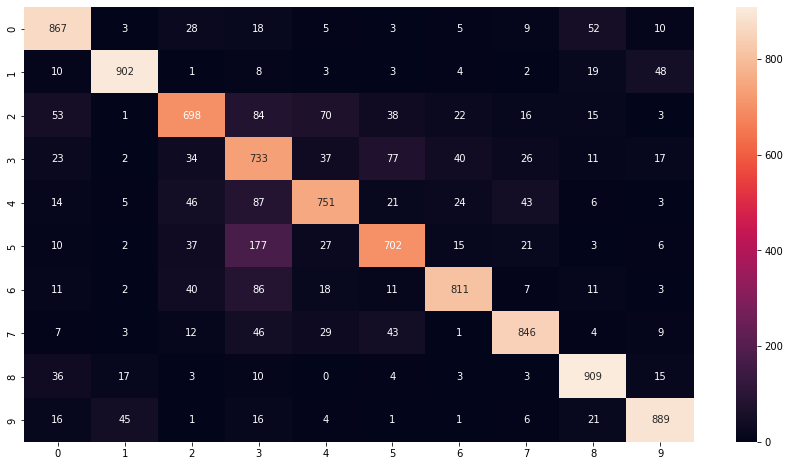

In [72]:
from sklearn.metrics import confusion_matrix

print(f"===== EPOCH ID: {sess.run(EPOCH_id)}")
print(f"===== MODEL PRECISION: {precision_by_batch(t_data, t_labels, 128)}")

predict_val = np.array([])

bs = 64
ttb = t_labels.shape[0] // bs
for i in range(0, ttb + 1):
    offset = (i * bs) % t_labels.shape[0]
    bx = t_data[offset:offset+bs, :]
    by = t_labels[offset:offset+bs]

    predict_val = np.concatenate((predict_val, sess.run(predict, feed_dict={x: bx})), axis=0)

cm = confusion_matrix(t_labels, predict_val)

plt.figure(figsize = (15,8))
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [67]:
sess_saver.save(sess, \
    f"{checkpoint_dir}/obj-detect-{MODEL_ID}",)

'/content/drive/My Drive/Thesis - Recommender System/CNN_ObjectDetection/obj-detect-2'